In [3]:
import pandas as pd
df = pd.read_csv('summer.csv')
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [8]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

### 

### In how many cities Summer Olympics is held so far?

In [10]:
print('In ' + str(len(df['City'].unique())) + ' Summer Olympics is held so far')

In 22 Summer Olympics is held so far


### 

### Which sport is having most number of Gold Medals so far?

0    Aquatics is having most number of Gold Medals
Name: sport, dtype: object


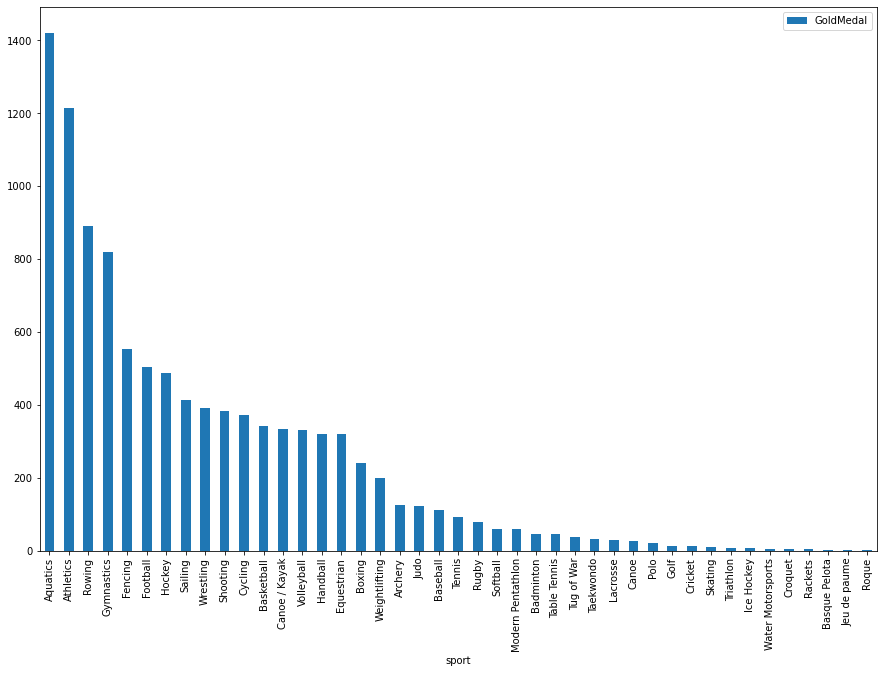

In [18]:
L = df['Sport']
M = df['Medal']

d = {}
for i in range(len(L)):
    if L[i] not in d:
        if M[i]=='Gold':
            d[L[i]]=1
    else:
        if M[i]=='Gold':
            d[L[i]]=d[L[i]]+1
data=[]
for i in d.keys():
    data.append([i,d[i]])
    
data=pd.DataFrame(data,columns=['sport','GoldMedal'])
data=data.sort_values(by='GoldMedal',ascending=False)

data.plot(x='sport',y='GoldMedal',kind='bar',figsize=(15,10))

print(data['sport'].head(1)+ " is having most number of Gold Medals")


### 

### Which sport is having most number of medals so far?

0    Aquatics is having most number of Medals so far
Name: sport, dtype: object


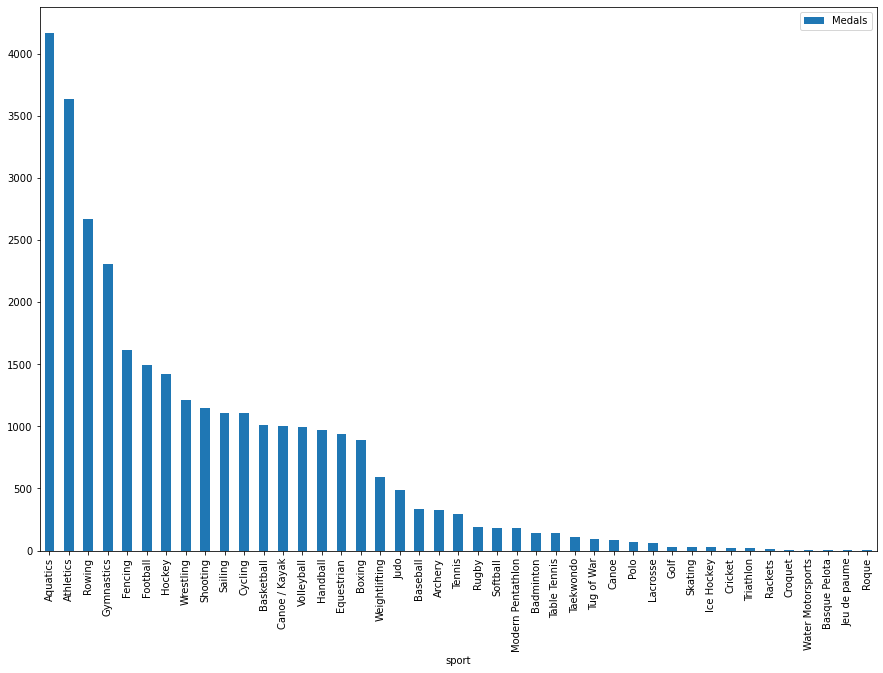

In [19]:
p = {}

for i in range(len(L)):
    if L[i] not in p:
        p[L[i]]=1
    else:
        p[L[i]]=p[L[i]]+1
        
info=[]
for i in p.keys():
    info.append([i,p[i]])
    
info=pd.DataFrame(info,columns=['sport','Medals'])
info=info.sort_values(by='Medals',ascending=False)

info.plot(x='sport',y='Medals',kind='bar',figsize=(15,10))

print(info['sport'].head(1)+ " is having most number of Medals so far")

### 

### Which Player has won most number of medals?

18640    PHELPS, Michael has won most number of Medals
Name: playername, dtype: object


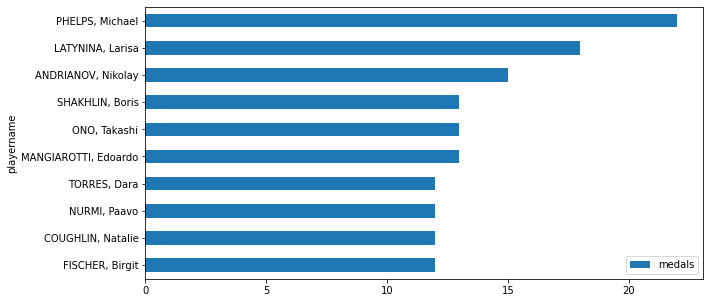

In [28]:
players = df['Athlete']

win={}
for i in range(len(players)):
    if players[i] not in win:
        win[players[i]] = 1
    else:
        win[players[i]] = win[players[i]] + 1
        
play=[]
for i in win.keys():
    play.append([i,win[i]])
    
play = pd.DataFrame(play, columns=['playername','medals'])
play = play.sort_values(by='medals',ascending=True).tail(10)

play.plot(x='playername',y='medals',kind='barh', figsize = (10, 5))

print(play['playername'].tail(1)+ " has won most number of Medals")

### 

### Which player has won most number Gold Medals of medals?

6851    PHELPS, Michael has won most number of Gold Me...
Name: playername, dtype: object


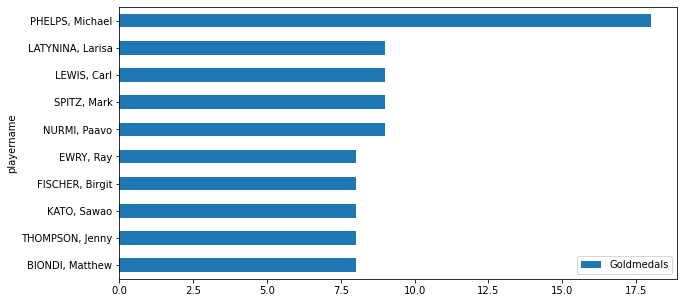

In [29]:
wins={}

for i in range(len(players)):
    if players[i] not in wins:
        if M[i]=='Gold':
            wins[players[i]]=1
    else:
        if M[i]=='Gold':
            wins[players[i]]=wins[players[i]]+1
            
won=[]
for i in wins.keys():
    won.append([i,wins[i]])
    
won=pd.DataFrame(won,columns=['playername','Goldmedals'])
won=won.sort_values(by='Goldmedals',ascending=True).tail(10)

won.plot(x='playername',y='Goldmedals',kind='barh', figsize = (10, 5))
print(won['playername'].tail(1)+ " has won most number of Gold Medals")



### In Which Year India Won first Gold Medal in Summer olympics?

In [31]:
for i in range(len(df['Country'])):
    if df['Country'][i]=='IND':
        if df['Medal'][i]=='Gold':
            print("India Won first Gold Medal in Summer Olympics in "+str(df['Year'][i]))
            break

India Won first Gold Medal in Summer Olympics in 1928


### 

### Which event is most popular in terms on number of players?

80    Football is most popular in terms of no.of pla...
Name: event, dtype: object


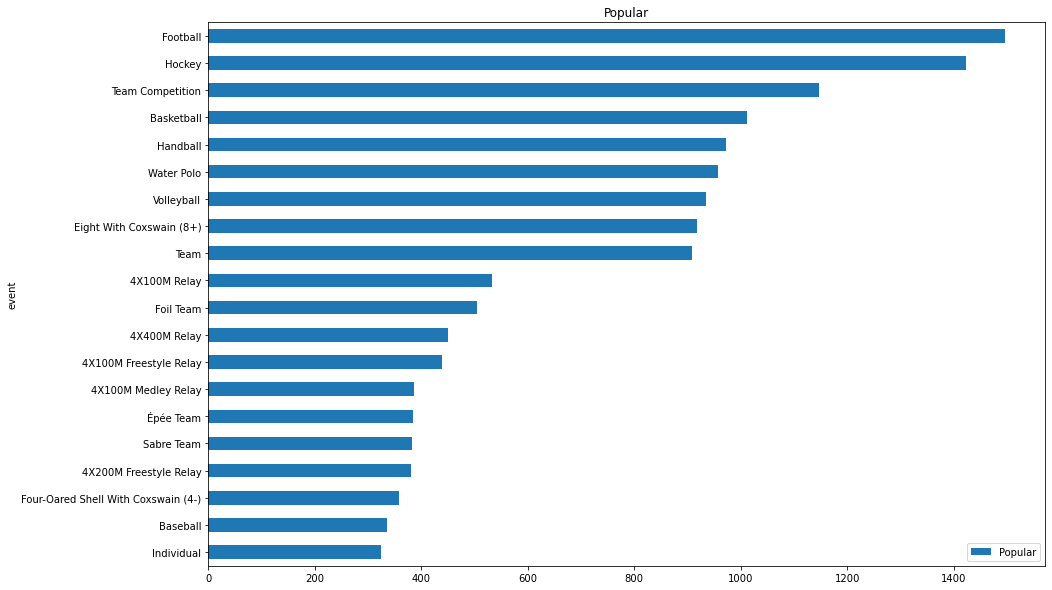

In [49]:
eventlist = df['Event']

events={}
for i in range(len(eventlist)):
    if eventlist[i] not in events:
        events[eventlist[i]]=1
    else:
        events[eventlist[i]]=events[eventlist[i]]+1
popular=[]

for i in events.keys():
    popular.append([i,events[i]])
    
popular=pd.DataFrame(popular,columns=['event','Popular'])
popular=popular.sort_values(by='Popular',ascending=True).tail(20)

popular.plot(subplots=True, x='event',y='Popular',kind = 'barh', figsize=(15,10))

print(popular['event'].tail(1)+" is most popular in terms of no.of players\n\n")

### 

### Which Sport is having most female Gold Medalists?

4    Aquatics is having most female gold medalist
Name: sport, dtype: object


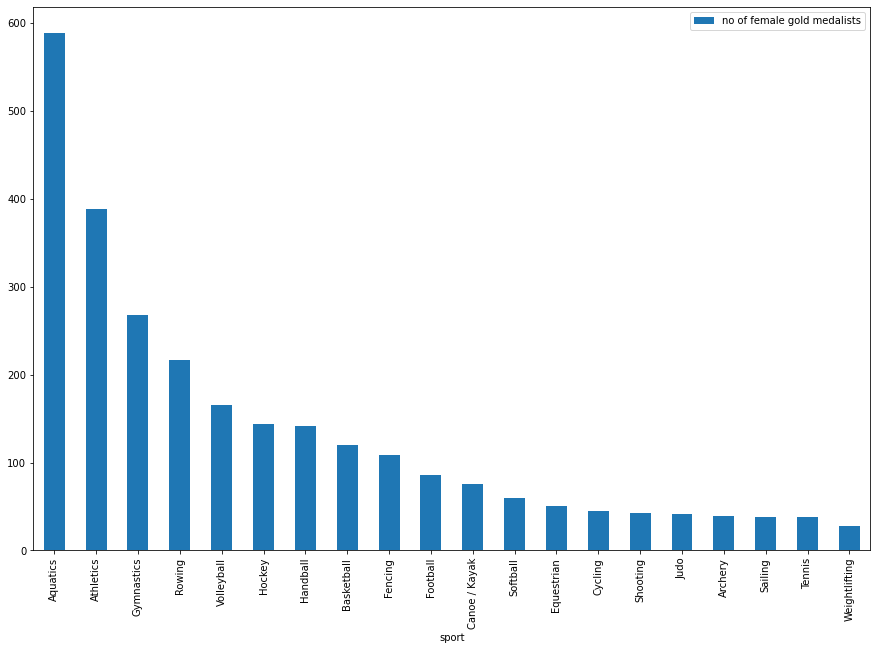

In [50]:
females={}
for i in range(len(L)):
    if L[i] not in females:
        if df['Gender'][i]=='Women':
            if df['Medal'][i]=='Gold':
                females[L[i]]=1
    else:
        if df['Gender'][i]=='Women':
              if df['Medal'][i]=='Gold':
                females[L[i]]+=1
                
Medalist=[]
for i in females.keys():
    Medalist.append([i,females[i]])
    
Medalist=pd.DataFrame(Medalist,columns=['sport','no of female gold medalists'])
Medalist=Medalist.sort_values(by='no of female gold medalists',ascending=False).head(20)

Medalist.plot(x='sport',y='no of female gold medalists',kind='bar',figsize=(15,10))

print(Medalist['sport'].head(1)+" is having most female gold medalist")